In [1]:
import os.path as path
import raw_data_preprocessing as rdp
import warnings

warnings.filterwarnings('ignore')

googledrive_loc = '/datasets/googledrive'
data_folder_loc = 'Yi_UCI_research/GSR other works/2020 Summer_predict individual training/data/'
file_name = 'raw data/yi feng larger dataset.csv'
data_path = path.join(googledrive_loc, data_folder_loc, file_name)
raw_data = rdp.read_raw_data(data_path)
print('Used Feature columns: {}'.format(rdp.feature_col_names))
data_no_missing = rdp.delete_missing_row(raw_data)


Used Feature columns: ['SES', 'VGQ', 'CFQ', 'Grit_Ambition', 'MRpre', 'DM_diff_pre', 'WM_pre', 'Updating_pre', 'Person_extraver', 'Person_agreeable', 'Person_conscien', 'Person_emot', 'Person_opennes']
The sample size of raw data is 410.
The sample size of no missing data is 379.


The sample size before delete crazy sub: 379
The sample size after delete crazy sub: 358
The mean r2 for <class 'regressor.PiecewiselinRegressor'> is: 0.741
          ID  WmeanN_1  WmeanN_2  WmeanN_3  WmeanN_4   WmeanN_5   WmeanN_6  \
75   Irta105  2.595912  3.100649  4.068750  6.002886   8.046310   8.202446   
107  IGTA129  4.569584  8.166917  9.920368  8.895126   9.908163  10.337349   
142  RGTA187  1.448276  3.655556  2.937173  3.119342   2.833333   4.262673   
192   ILB112  2.410714  2.207207  3.155620  4.011905   3.280802   3.246154   
202   Rlb105  2.183024  2.516049  2.604167  2.061333   2.850515   2.000000   
203   RLB162  5.696104  5.971722  5.506143  3.671642   8.583960   6.234694   
205   RLB228  2.702479  3.263441  3.892216  3.829396   5.342105   5.026667   
213   ILB221  2.405660  2.605634  2.671875  2.787013   2.677083   3.455243   
220   ILB101  4.666667  4.492625  5.550847  5.831909   4.923483   5.616715   
238   RLB156  3.148485  3.510989  4.140625  2.595420   3.595238

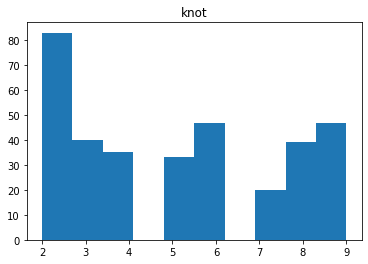

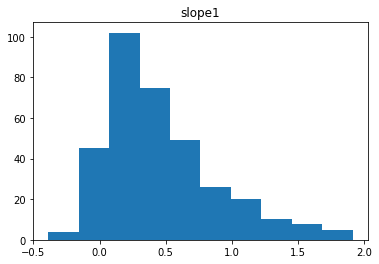

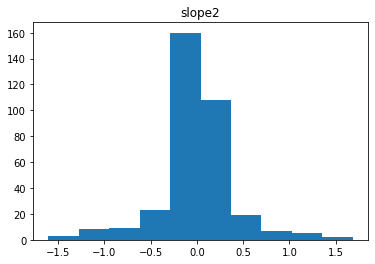

In [2]:
import regressor as reg
import cluster as clu
import intervention_data_preprocessing as idp
import individual_differences_plot as plot
int_test = idp.InterventionProcessor(data_no_missing)
int_test.basic_analyze()
piece_lin_reg = reg.PiecewiselinRegressor(['knot', 'slope1', 'slope2'])
int_test.register_regressor(piece_lin_reg)
int_test.fit()
int_test.mark_outlier(['r2','slope1','slope2'])
int_test.delete_outlier()
plot.plot_distribution(int_test.data, ['knot','slope1','slope2'])

The silhouette score of GaussianMixture(n_components=3, random_state=0) is: 0.340
Sample of each cluster: label
0    121
1     83
2    140
dtype: int64
The mean of each mixture component: [[-0.27710909  0.1699385 ]
 [-1.2269439   0.78622193]
 [ 1.03570742 -0.65628867]]


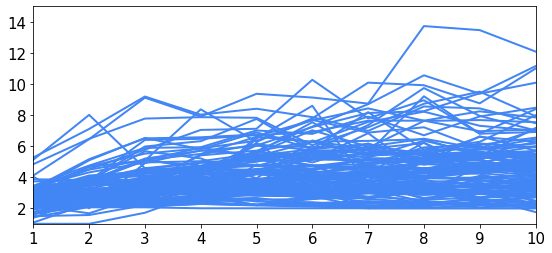

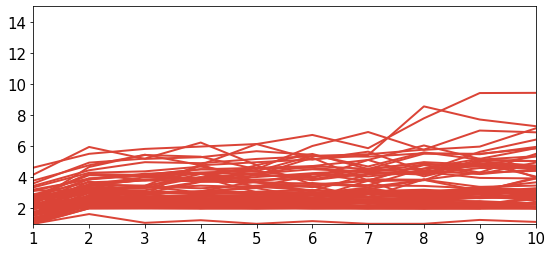

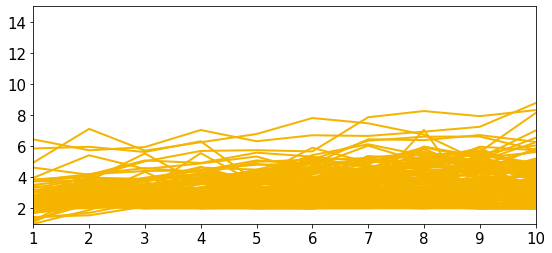

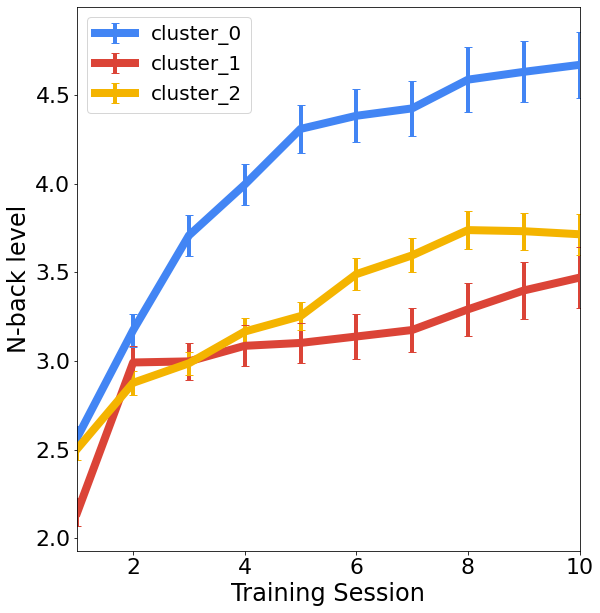

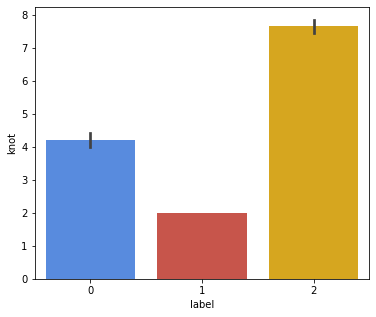

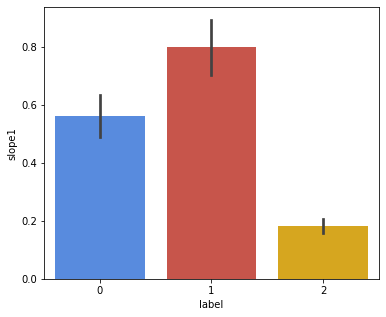

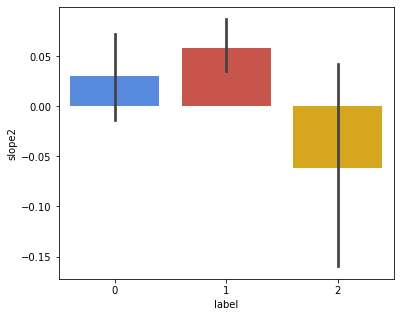

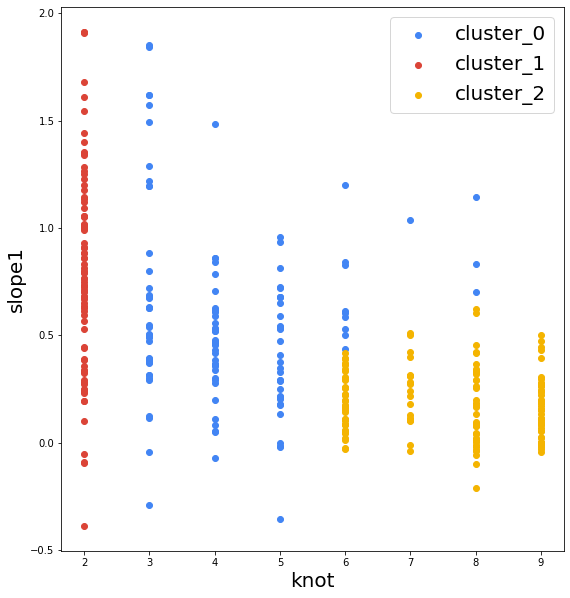

In [3]:
# clustering
kmeans_3com = clu.Kmeans(3, ['knot', 'slope1'])
em_3com = clu.EM(3, ['knot','slope1'])
int_test.register_cluster_model(em_3com)
int_test.cluster()
# plot
plot.plot_cluster_result(int_test.data, int_test.intervention_col_names)
plot.bar_plot_cluster(int_test.data, ['knot','slope1','slope2'])
plot.plot_scatter_cluster(int_test.data, ['knot','slope1'])

In [4]:
int_test.data

,ID,WmeanN_1,WmeanN_2,WmeanN_3,WmeanN_4,WmeanN_5,WmeanN_6,WmeanN_7,WmeanN_8,WmeanN_9,...,std,knot,slope1,slope2,r2,outlier,label,cluster_0,cluster_1,cluster_2
0,RGTA104,2.532189,2.951220,3.981067,3.069697,6.489933,8.599343,3.490166,5.315956,6.595960,...,2.021831,6.0,0.828884,-0.132875,0.526718,False,0,0.998148,0.0,0.001852
1,RGTA107,2.004138,2.490342,2.164074,2.579515,4.816541,4.362275,4.104225,2.912553,4.726727,...,1.169164,5.0,0.544715,0.112200,0.664656,False,0,0.959562,0.0,0.040438
2,RGTA110,3.025449,3.758287,3.861799,3.580940,4.017241,5.250646,4.645780,5.345315,4.882199,...,0.787565,8.0,0.294313,-0.164472,0.830029,False,2,0.009076,0.0,0.990924
3,RGTA113,2.552137,2.758261,3.335548,3.615517,3.603839,4.394864,4.600334,4.544872,5.965574,...,1.153073,8.0,0.335222,0.560211,0.949669,False,2,0.011386,0.0,0.988614
4,RRTA101,1.738197,2.528198,2.299090,2.566576,3.322917,3.460189,3.578313,3.400264,3.597671,...,0.639926,7.0,0.309710,-0.261232,0.859992,False,2,0.064430,0.0,0.935570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,RSOL219,2.450000,2.560000,2.560000,2.740000,2.580000,2.430000,2.780000,2.550000,2.380000,...,0.180985,9.0,-0.003000,0.423111,0.517812,False,2,0.001218,0.0,0.998782
406,RSOL220,2.540000,2.910000,2.710000,2.600000,2.620000,3.230000,2.640000,2.600000,2.820000,...,0.207461,6.0,0.047294,-0.056471,0.145473,False,2,0.297728,0.0,0.702272
407,RSOL221,2.640000,3.120000,3.540000,3.640000,3.850000,3.910000,4.260000,3.910000,4.210000,...,0.687973,9.0,0.172667,0.833778,0.910935,False,2,0.000884,0.0,0.999116
408,RSOL222,2.150000,2.050000,2.200000,2.000000,2.050000,2.000000,2.000000,2.000000,2.100000,...,0.072457,6.0,-0.027647,0.008235,0.409897,False,2,0.385706,0.0,0.614294


These two features correlated above 0.5:Grit_Ambition, Person_conscien
These two features correlated above 0.5:Person_conscien, Grit_Ambition


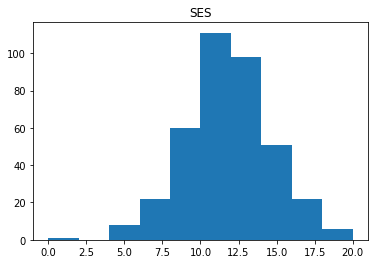

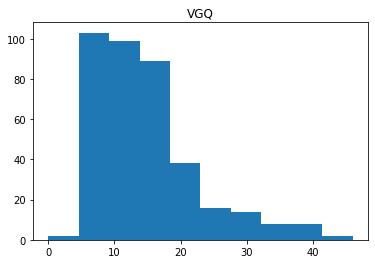

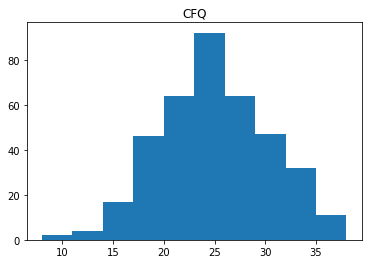

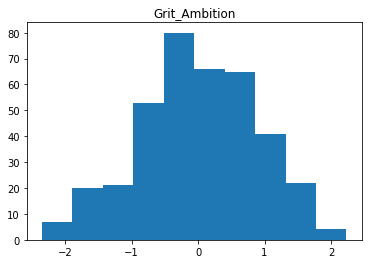

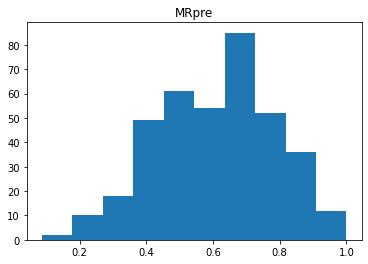

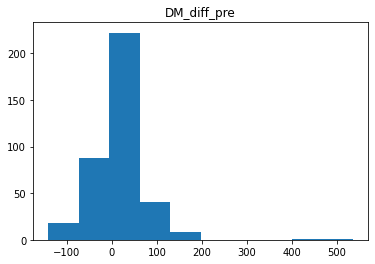

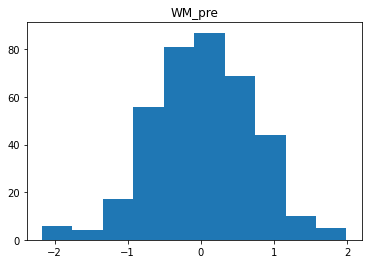

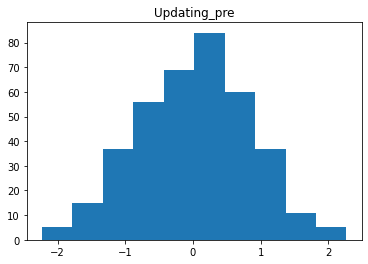

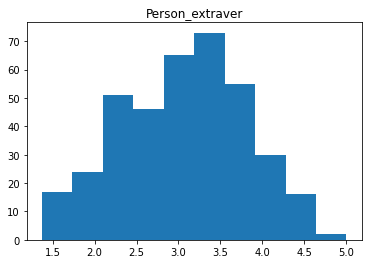

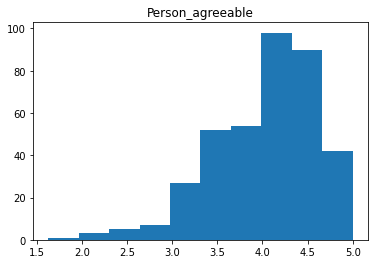

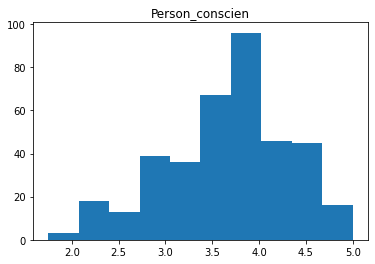

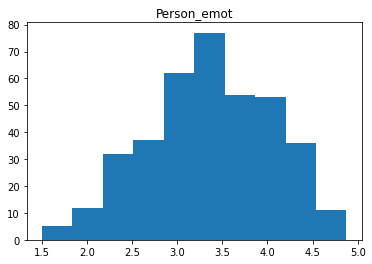

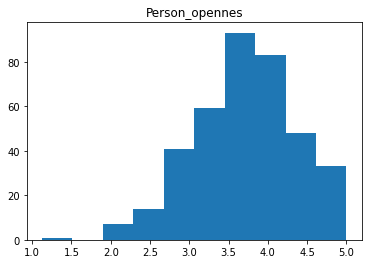

In [5]:
import feature_preprocessor as fp
fp_test = fp.FeatureProcessor(data_no_missing)
fp_test.corr_features()
fp_test.distri_features()
fp_test.discretize_features()

In [6]:
fp_test.data

,ID,SES,VGQ,CFQ,Grit_Ambition,MRpre,DM_diff_pre,WM_pre,Updating_pre,Person_extraver,Person_agreeable,Person_conscien,Person_emot,Person_opennes,SES_category,VGQ_category
0,RGTA104,12.0,7.0,22.0,-0.02971,0.391304,2.625000,-0.004020,0.681206,3.000,3.250,4.000,2.750,3.500,middle_ses,less_play
1,RGTA107,11.0,12.0,21.0,0.96336,0.521739,-38.946429,-0.188523,-0.927540,3.625,3.625,3.875,3.750,4.125,middle_ses,less_play
2,RGTA110,7.0,6.0,16.0,-0.46505,0.391304,87.500000,-0.269890,-1.473756,3.500,4.000,3.750,2.375,3.500,low_ses,less_play
3,RGTA113,9.0,13.0,15.0,1.16176,0.739130,-40.416667,-0.004020,-0.985468,3.375,3.500,5.000,4.375,3.625,low_ses,less_play
4,RRTA101,16.0,11.0,24.0,-0.70591,0.391304,25.125000,-0.188523,0.393197,3.125,4.000,3.000,3.375,3.250,high_ses,less_play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,RSOL219,11.0,20.0,26.0,0.32100,0.608696,23.280000,0.216802,-0.724982,2.880,4.880,3.630,3.250,4.000,middle_ses,less_play
406,RSOL220,11.0,12.0,19.0,-0.35520,0.565217,72.820000,-0.160297,-0.049173,3.000,4.630,3.380,4.000,3.880,middle_ses,less_play
407,RSOL221,12.0,15.0,29.0,0.57441,0.521739,22.300000,-0.139347,-0.211434,4.630,4.750,3.750,2.500,4.750,middle_ses,less_play
408,RSOL222,14.0,14.0,27.0,-1.23403,0.478261,-112.880000,0.098331,-0.838878,2.630,3.500,2.500,3.130,3.500,high_ses,less_play


The F test result for SES: f:0.797, p:0.452
The F test result for VGQ: f:4.666, p:0.010
The F test result for CFQ: f:0.032, p:0.969
The F test result for Grit_Ambition: f:1.351, p:0.260
The F test result for MRpre: f:3.957, p:0.020
The F test result for DM_diff_pre: f:2.007, p:0.136
The F test result for WM_pre: f:6.504, p:0.002
The F test result for Updating_pre: f:0.721, p:0.487
The F test result for Person_extraver: f:1.057, p:0.349
The F test result for Person_agreeable: f:0.219, p:0.803
The F test result for Person_conscien: f:0.447, p:0.640
The F test result for Person_emot: f:0.335, p:0.715
The F test result for Person_opennes: f:2.046, p:0.131
(344, 13)
WM_pre 6.503996655792581
VGQ 4.666336368813593
MRpre 3.956974588471946
Person_opennes 2.0458949865839196
DM_diff_pre 2.0070169489328946
Grit_Ambition 1.3507704967100982
Person_extraver 1.0568252453513127
SES 0.7969834609804411
Updating_pre 0.720696720256444
Person_conscien 0.44733716879469165
Person_emot 0.3351411164054491
Perso

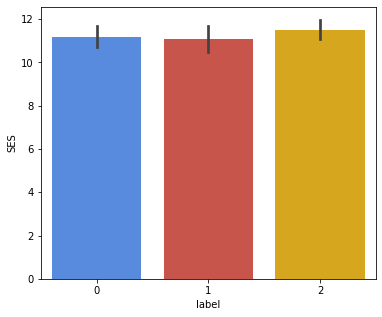

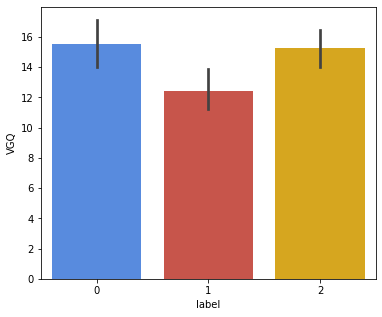

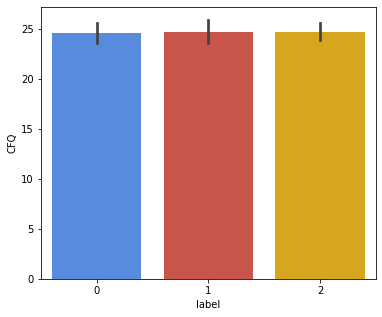

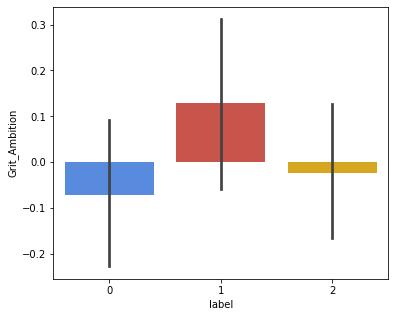

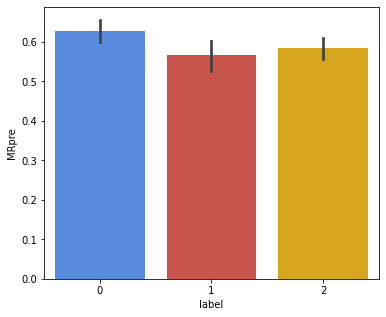

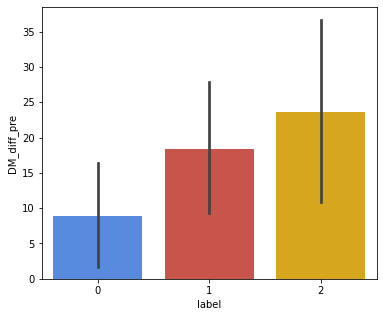

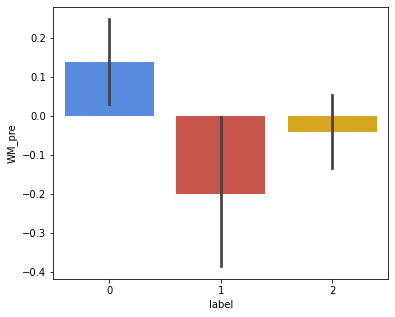

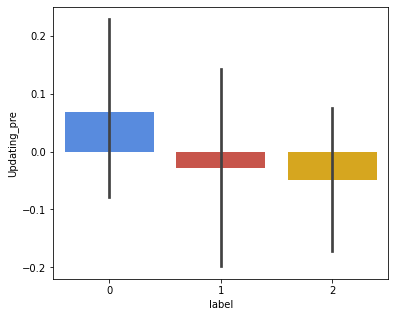

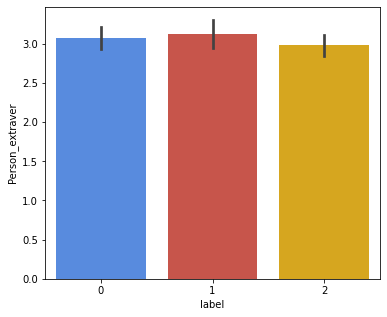

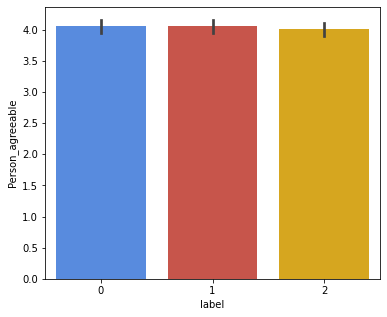

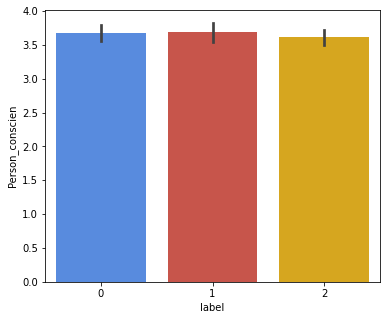

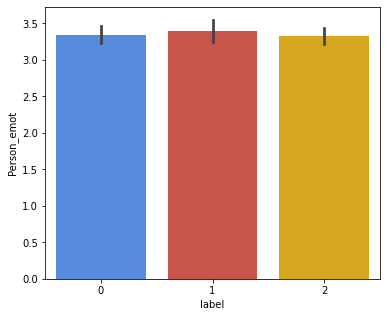

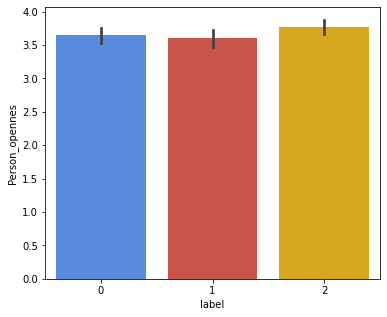

In [7]:
import classification_preprocessor as cp
cp_test = cp.ClassifyPreprocessor(int_test.data, fp_test.data)
# cp_test.delete_outlier()
cp_test.feature_test()
cp_test.feature_selection(8)
cp_test.use_categorical_features()
X, Y = cp_test.resample_standardize({0:121, 1:113, 2:140})
print('The input and output shape: {} and {}'.format(X.shape, Y.shape)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b8ead81-70bf-4d6b-bd50-8194f8f72b46' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>